## 2767 - Machine Learning - 2425_T3
### Assignement 1 - TelCom Solutions Churn Crisis

#### Student: Marco Piccolo - 63996

Importing Libraries

In [1]:
# Import necessary libraries

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import (
    f1_score, precision_recall_curve, recall_score, precision_score,
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

import xgboost as xgb



Loading the dataset

In [2]:
# Loading the dataset

df = pd.read_csv("2767ML_assignment1_data.csv")

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,NE,64,408,No,No,0,261.9,113,44.52,148.1,99,12.59,145.2,74,6.53,13.8,4,3.73,0,False
1,TX,139,510,Yes,Yes,31,203.5,82,34.60,200.3,72,17.03,214.0,112,9.63,13.4,6,3.62,1,True
2,VT,93,510,No,No,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,False
3,GA,136,415,No,No,0,163.4,83,27.78,249.3,119,21.19,249.7,90,11.24,9.8,4,2.65,7,False
4,IL,16,415,Yes,No,0,110.0,91,18.70,147.3,75,12.52,190.5,73,8.57,6.4,7,1.73,0,False


#### Data Overview

In [3]:
# Check for dimension of the dataset
df.shape

(2999, 20)

In [4]:
# Check for null values and variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2999 non-null   object 
 1   Account length          2999 non-null   int64  
 2   Area code               2999 non-null   int64  
 3   International plan      2999 non-null   object 
 4   Voice mail plan         2999 non-null   object 
 5   Number vmail messages   2999 non-null   int64  
 6   Total day minutes       2999 non-null   float64
 7   Total day calls         2999 non-null   int64  
 8   Total day charge        2999 non-null   float64
 9   Total eve minutes       2999 non-null   float64
 10  Total eve calls         2999 non-null   int64  
 11  Total eve charge        2999 non-null   float64
 12  Total night minutes     2999 non-null   float64
 13  Total night calls       2999 non-null   int64  
 14  Total night charge      2999 non-null   

In [5]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,101.348449,436.735245,8.194065,179.796132,100.572858,30.565895,201.225375,100.136379,17.104365,201.064688,100.077026,9.048006,10.209003,4.474825,2.756939,1.566522
std,39.741765,42.112741,13.731450,54.313911,20.100779,9.233338,50.952796,20.076914,4.330967,50.610602,19.485898,2.277532,2.772336,2.471441,0.748525,1.327655
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,88.000000,24.430000,166.550000,87.000000,14.155000,167.250000,87.000000,7.525000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.300000,101.000000,30.480000,201.800000,101.000000,17.150000,201.600000,100.000000,9.070000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,415.000000,20.000000,216.850000,114.000000,36.865000,235.450000,114.000000,20.015000,235.300000,113.000000,10.590000,12.000000,6.000000,3.240000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,18.900000,20.000000,5.100000,9.000000


In [6]:
print('There are', df.shape[0], 'observations in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', df.isnull().sum().sum())

There are 2999 observations in this dataset
Number of Duplicates: 0
Number of Missing Values by column:
 State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64
Number of Missing Values: 0


There are neither null values nor duplicates in the dataset.

##### Non-Continuous Variables

In [7]:
# Print  the unique values for each categorical variable

for column in df.columns:
    if df[column].dtypes == object or df[column].dtypes == bool:
        print(f'{column} {"-"*(30-len(column))} {df[column].unique()}')
    else:
        pass

State ------------------------- ['NE' 'TX' 'VT' 'GA' 'IL' 'IN' 'OK' 'TN' 'NV' 'VA' 'KS' 'CO' 'WA' 'MT'
 'ND' 'SD' 'AL' 'UT' 'MN' 'WI' 'OH' 'WY' 'MD' 'RI' 'PA' 'CT' 'DC' 'DE'
 'MA' 'OR' 'NJ' 'SC' 'MO' 'HI' 'IA' 'LA' 'AK' 'ME' 'NM' 'KY' 'NY' 'MI'
 'WV' 'FL' 'NC' 'NH' 'AR' 'AZ' 'ID' 'CA' 'MS']
International plan ------------ ['No' 'Yes']
Voice mail plan --------------- ['No' 'Yes']
Churn ------------------------- [False  True]


##### Continuous Variables

In [8]:
# Print minimum, maximum and range values for each continuous variable

for column in df.columns:
    if (df[column].dtype == float or df[column].dtype == int):
        minimum = round((df[column].min()),3)
        maximum = round((df[column].max()),3)
        range = round((maximum-minimum),3)
        print(f'{column} {"-"*(22-len(column))} Min: {minimum} {"-"*(12-len(str(minimum)))} Max: {maximum} {"-"*(12-len(str(maximum)))} Range: {range}')
    else:        pass

Account length -------- Min: 1 ----------- Max: 243 --------- Range: 242
Area code ------------- Min: 408 --------- Max: 510 --------- Range: 102
Number vmail messages - Min: 0 ----------- Max: 51 ---------- Range: 51
Total day minutes ----- Min: 0.0 --------- Max: 350.8 ------- Range: 350.8
Total day calls ------- Min: 0 ----------- Max: 165 --------- Range: 165
Total day charge ------ Min: 0.0 --------- Max: 59.64 ------- Range: 59.64
Total eve minutes ----- Min: 0.0 --------- Max: 363.7 ------- Range: 363.7
Total eve calls ------- Min: 0 ----------- Max: 170 --------- Range: 170
Total eve charge ------ Min: 0.0 --------- Max: 30.91 ------- Range: 30.91
Total night minutes --- Min: 23.2 -------- Max: 395.0 ------- Range: 371.8
Total night calls ----- Min: 33 ---------- Max: 175 --------- Range: 142
Total night charge ---- Min: 1.04 -------- Max: 17.77 ------- Range: 16.73
Total intl minutes ---- Min: 0.0 --------- Max: 18.9 -------- Range: 18.9
Total intl calls ------ Min: 0 --------

### Exploratory Data Analysis

##### Encoding Categorical Variable

In order to compute the correlation map and see how every variable is related to the 'Churn' variable, we need to encode all the categorical variables.

Encoding the variables "International plan" and "Voice mail plan"

In [9]:
# Create a copy of the original dataframe to avoid modifying it
df_encoded = df.copy()

# Encoding Categorical Columns
cat_columns = ["International plan", "Voice mail plan"]
label_encoder = LabelEncoder()

for col in cat_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Ensure 'Churn' is an integer type
df_encoded['Churn'] = df_encoded['Churn'].astype(int)

# Display the first few rows of the new dataframe
df_encoded.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,NE,64,408,0,0,0,261.9,113,44.52,148.1,99,12.59,145.2,74,6.53,13.8,4,3.73,0,0
1,TX,139,510,1,1,31,203.5,82,34.60,200.3,72,17.03,214.0,112,9.63,13.4,6,3.62,1,1
2,VT,93,510,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
3,GA,136,415,0,0,0,163.4,83,27.78,249.3,119,21.19,249.7,90,11.24,9.8,4,2.65,7,0
4,IL,16,415,1,0,0,110.0,91,18.70,147.3,75,12.52,190.5,73,8.57,6.4,7,1.73,0,0


#### Kernel Density Plot

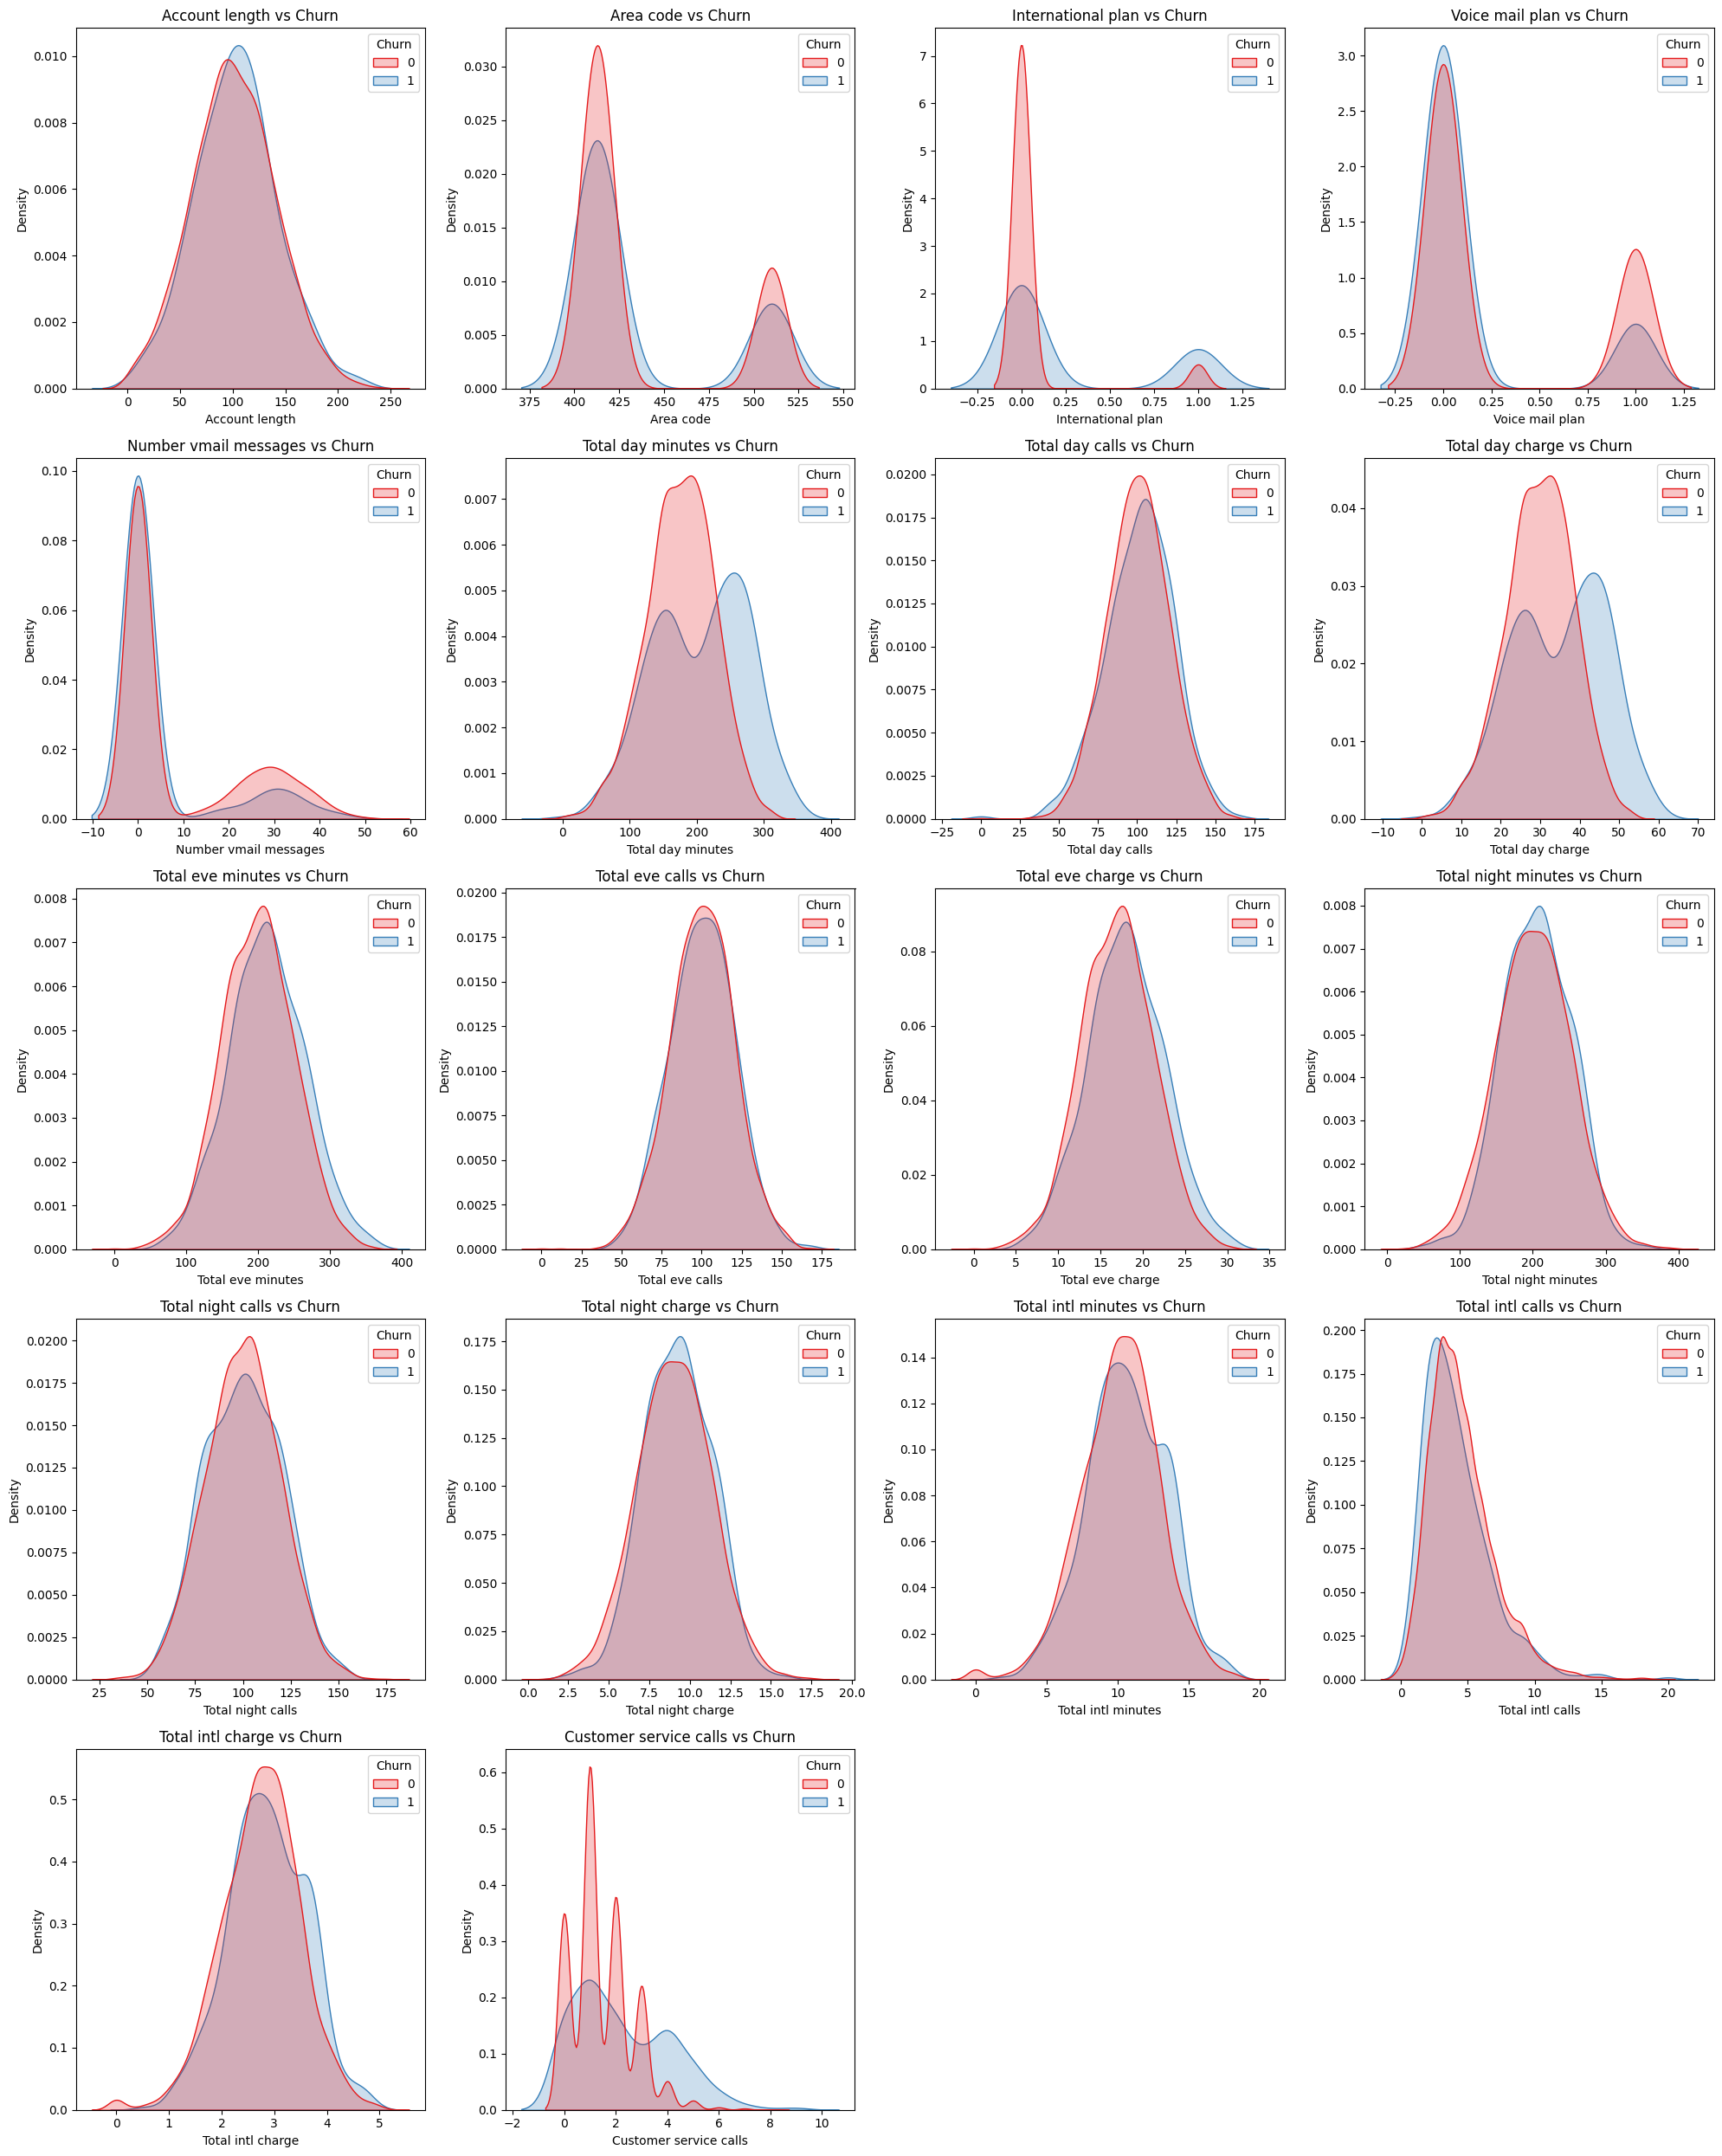

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot KDE plots for continuous variables with respect to 'Churn'
def plot_kde_plots(df, target_variable='Churn'):
    # Select continuous columns (int or float) and exclude the target variable if present
    continuous_columns = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != target_variable]
    
    # Create a dynamic grid of subplots: 4 per row, adjust number of rows based on the number of continuous variables
    num_plots = len(continuous_columns)
    num_cols = 4  # Number of columns per row
    num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0)  # Calculate rows dynamically

    plt.figure(figsize=(20, 5 * num_rows))  # Set figure size based on number of rows

    # Loop through each continuous column and create KDE plots
    for i, column in enumerate(continuous_columns):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.kdeplot(data=df, x=column, hue=target_variable, palette='Set1', fill=True, common_norm=False)
        plt.title(f'{column} vs {target_variable}')
    
    plt.tight_layout()  # Ensure subplots don't overlap
    plt.show()

# Call the function with your dataframe (replace 'df_encoded' with your actual dataframe)
plot_kde_plots(df_encoded)

Churners (blue) show higher distributions for Total day minutes, Total day charge, and Customer service calls, while features like Total eve minutes, Total night minutes, Total intl minutes, and Account length overlap more between churners and non-churners (red).Overall, heavier daytime usage and more Customer service calls emerge as strong churn indicators.

#### Outliers

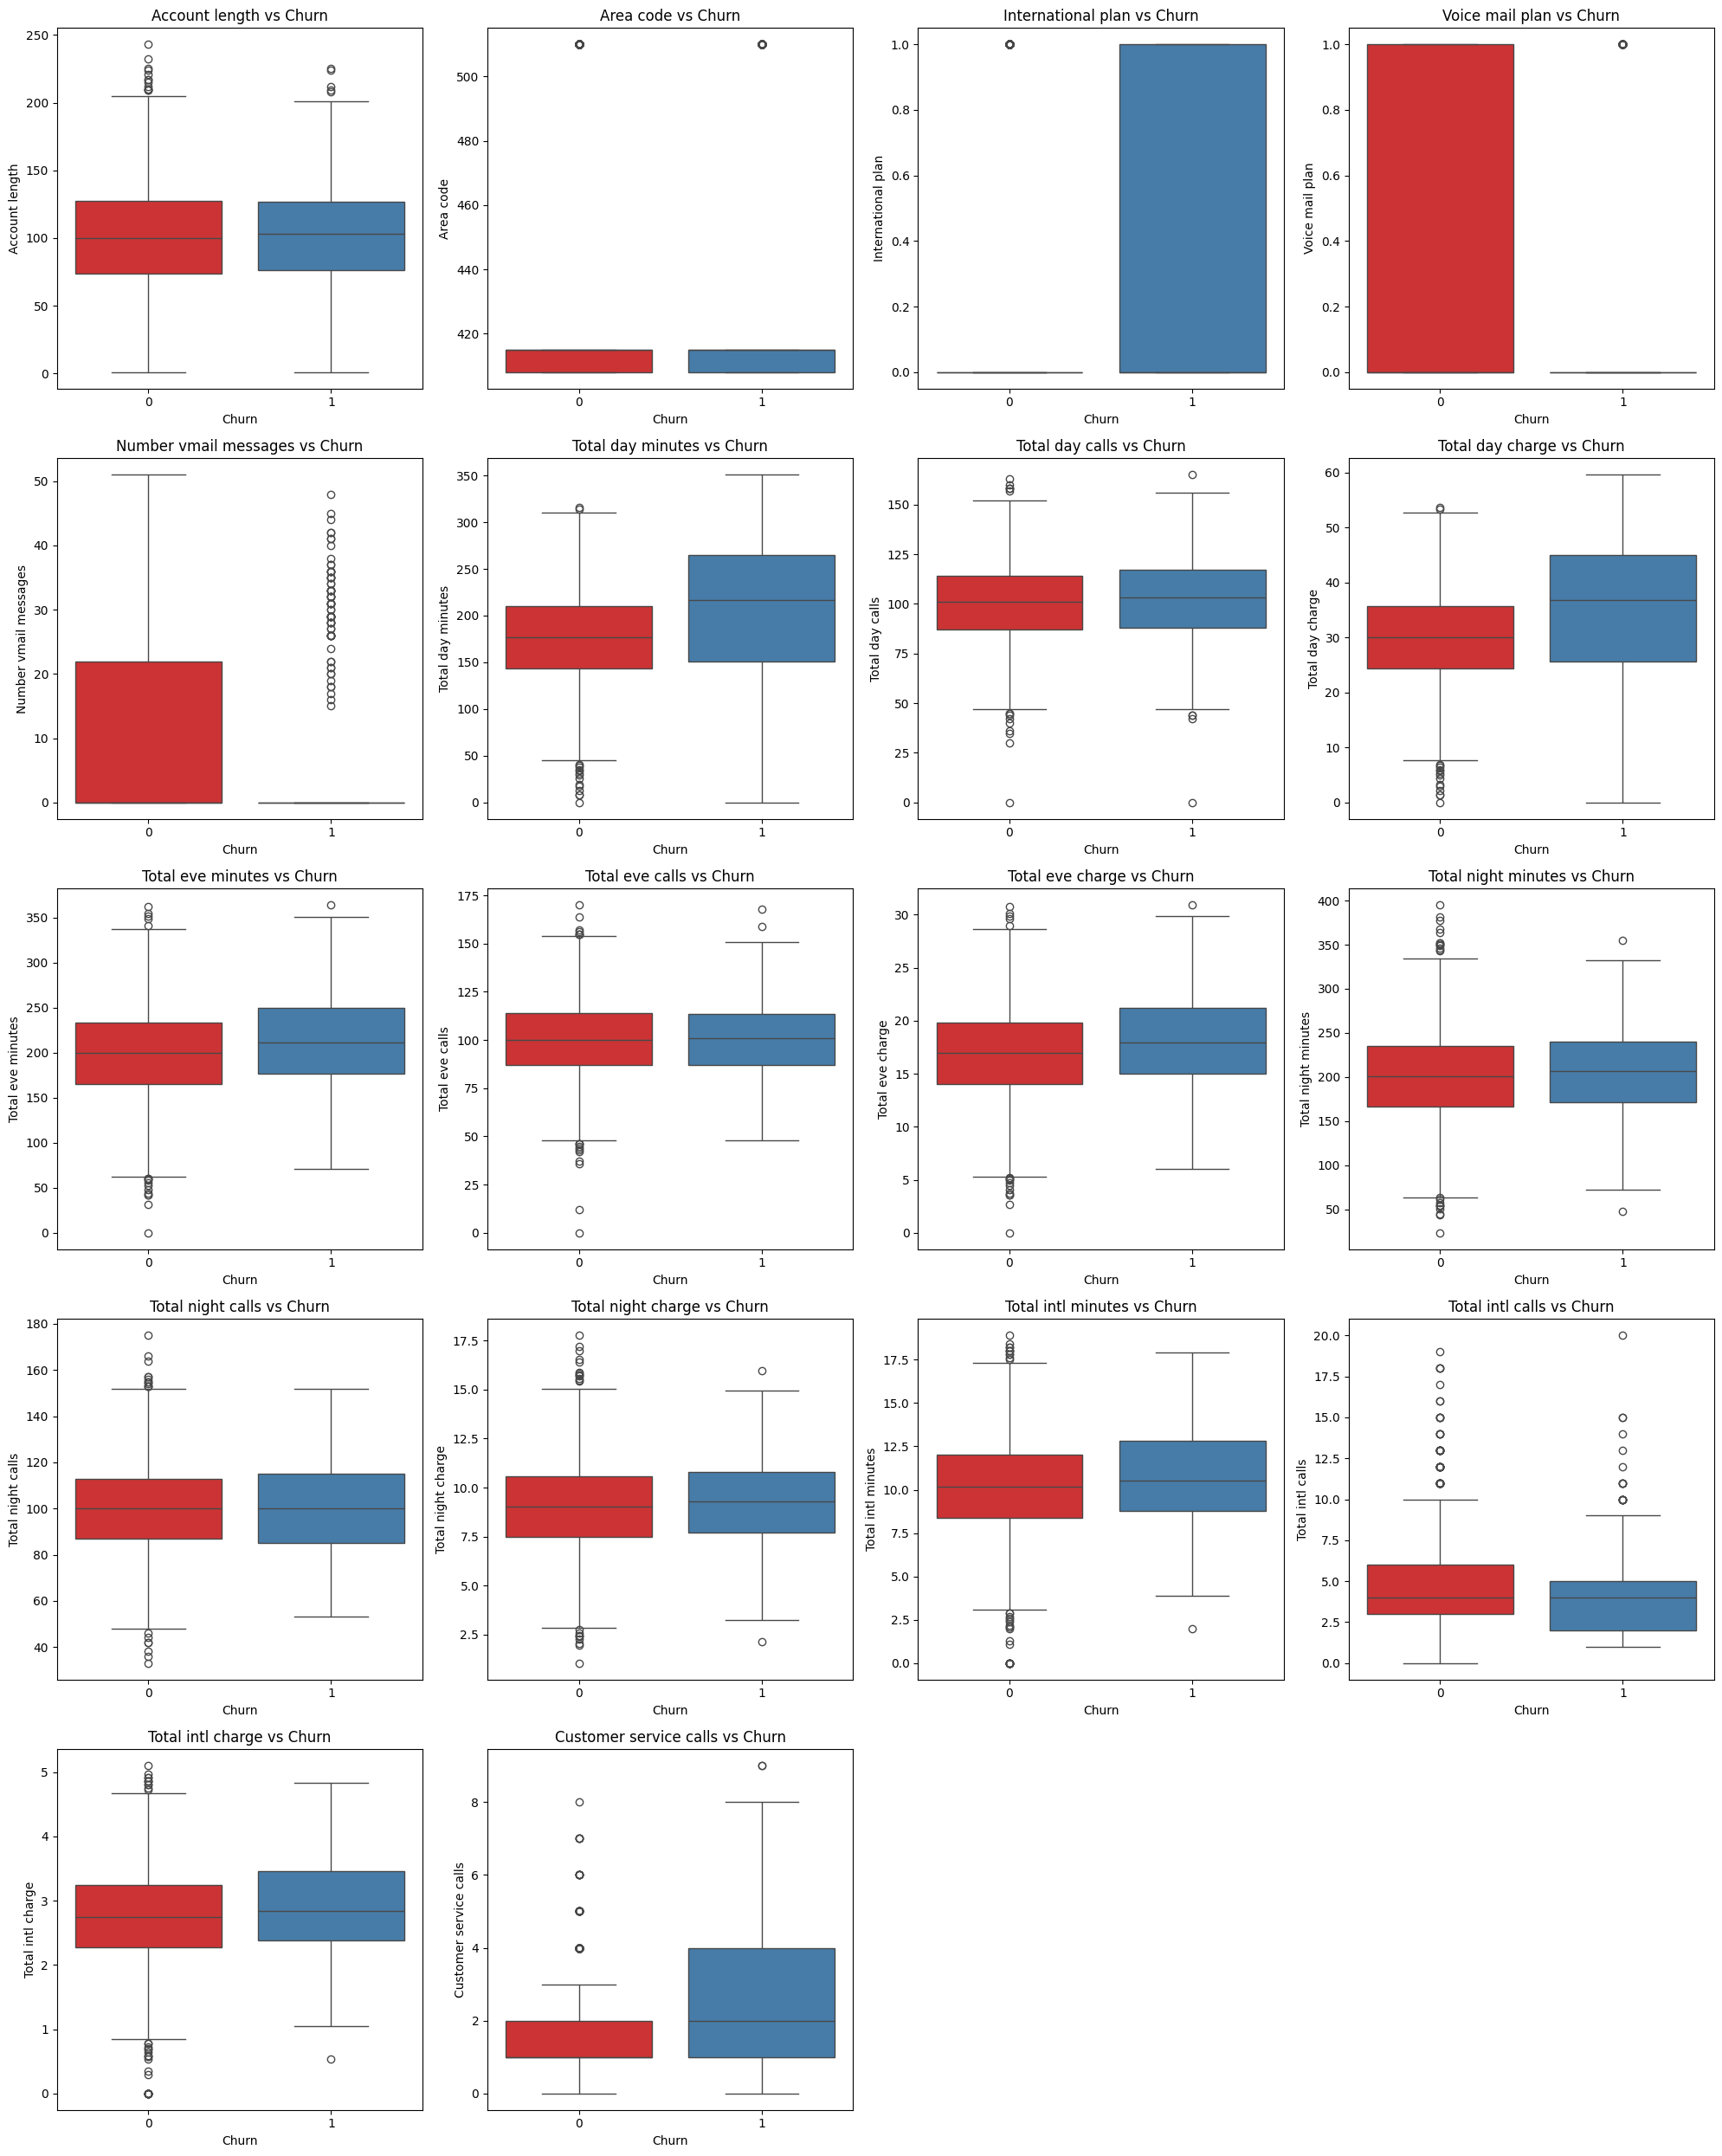

In [11]:
# Function to plot box plots for continuous variables with respect to 'Churn'
def plot_box_plots(df, target_variable='Churn'):
    # Select continuous columns (int or float) and exclude the target variable if present
    continuous_columns = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != target_variable]
    
    # Create a dynamic grid of subplots: 4 per row, adjust number of rows based on the number of continuous variables
    num_plots = len(continuous_columns)
    num_cols = 4
    num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0)

    plt.figure(figsize=(20, 5 * num_rows))  # Set figure size based on number of rows

    # Loop through each continuous column and create box plots
    for i, column in enumerate(continuous_columns):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.boxplot(x=target_variable, y=column, data=df, hue=target_variable, palette='Set1', legend=False)
        plt.title(f'{column} vs {target_variable}')
    
    plt.tight_layout()  # Ensure subplots don't overlap
    plt.show()

# Call the function with your dataframe (replace 'df_encoded' with your actual dataframe)
plot_box_plots(df_encoded)


In [12]:
# Loop over each numeric column in the DataFrame and format the output
for column in df.select_dtypes(include='number').columns:
   # Calculate the 1st and 3rd quartiles for the current column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
                        
    # Calculate the number of observations in each category
    below_Q1 = (df[column] < Q1).sum()
    between_Q1_and_Q3 = ((df[column] >= Q1) & (df[column] <= Q3)).sum()
    above_Q3 = (df[column] > Q3).sum()

    # Format and print the results for each column with dynamic spacing
    print(f'{column} {"-"*(23-len(column))} Below Q1: {below_Q1} {"-"*(15-len(str(below_Q1)))} Between Q1 and Q3: {between_Q1_and_Q3} {"-"*(12-len(str(between_Q1_and_Q3)))} Above Q3: {above_Q3}')


Account length --------- Below Q1: 728 ------------ Between Q1 and Q3: 1524 -------- Above Q3: 747
Area code -------------- Below Q1: 0 -------------- Between Q1 and Q3: 2257 -------- Above Q3: 742
Number vmail messages -- Below Q1: 0 -------------- Between Q1 and Q3: 2258 -------- Above Q3: 741
Total day minutes ------ Below Q1: 748 ------------ Between Q1 and Q3: 1501 -------- Above Q3: 750
Total day calls -------- Below Q1: 749 ------------ Between Q1 and Q3: 1523 -------- Above Q3: 727
Total day charge ------- Below Q1: 748 ------------ Between Q1 and Q3: 1501 -------- Above Q3: 750
Total eve minutes ------ Below Q1: 750 ------------ Between Q1 and Q3: 1499 -------- Above Q3: 750
Total eve calls -------- Below Q1: 726 ------------ Between Q1 and Q3: 1559 -------- Above Q3: 714
Total eve charge ------- Below Q1: 750 ------------ Between Q1 and Q3: 1499 -------- Above Q3: 750
Total night minutes ---- Below Q1: 750 ------------ Between Q1 and Q3: 1500 -------- Above Q3: 749
Total nigh

#### Balance Disribution in Churn

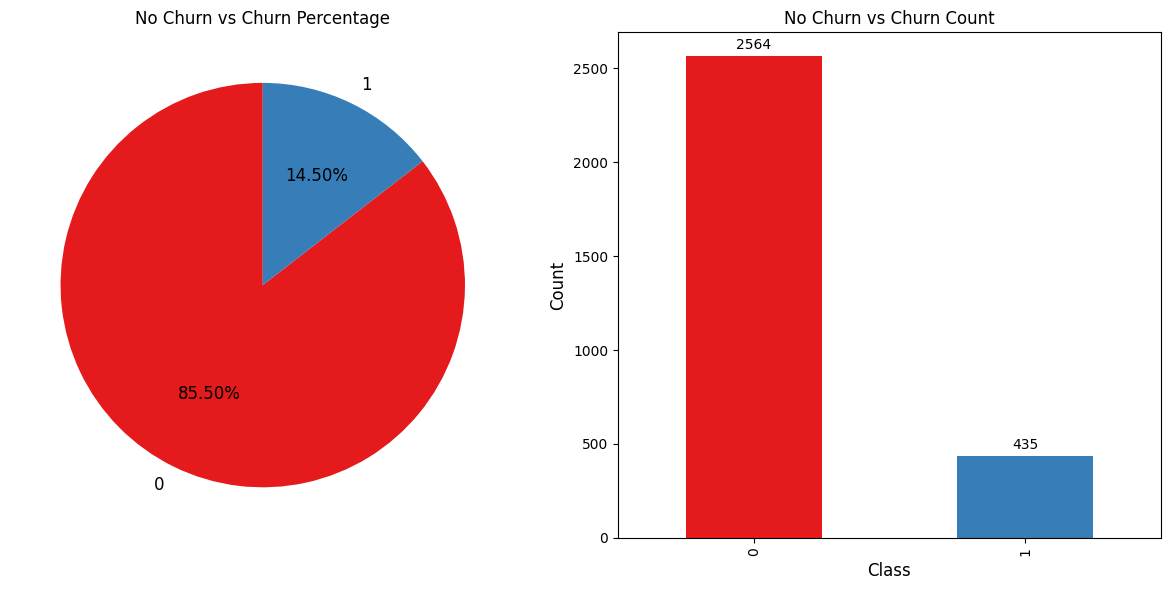

In [13]:
# Note: 1 = Churn, 0 = No Churn
class_counts = df_encoded['Churn'].value_counts()

# Prepare a color palette from 'Set1' for two categories
colors = sns.color_palette('Set1', n_colors=2)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart using Pandas .plot.pie()
class_counts.plot.pie(
    ax=axes[0],
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12},
    title='No Churn vs Churn Percentage'
)
axes[0].set_ylabel('')  # Remove default y-label from Pandas pie plot

# Bar chart using Pandas .plot.bar()
class_counts.plot.bar(
    ax=axes[1],
    color=colors,
    title='No Churn vs Churn Count'
)
axes[1].bar_label(axes[1].containers[0], padding=3)  # Annotate bars with counts
axes[1].set_xlabel('Class', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


#### Frequencies


Absolute Frequency

In [14]:
# absolute frequency for the Gender and Status variables.
def absolute_frequency (column):
    absolute_freq = df_encoded[column].value_counts()
    absolute_freq = absolute_freq.round(2)

    return absolute_freq

print(absolute_frequency('International plan'),'\n')
print(absolute_frequency('Churn'),'\n')

International plan
0    2711
1     288
Name: count, dtype: int64 

Churn
0    2564
1     435
Name: count, dtype: int64 



Relative Frequency

In [15]:
# relative frequency for the 'gender' variable.
def relative_frequency (column):
    relative_freq = df_encoded[column].value_counts(normalize=True)*100
    realtive_freq = relative_freq.round(2)

    return realtive_freq

print(relative_frequency('International plan'),'\n')
print(relative_frequency('Churn'),'\n')

International plan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Churn
0    85.5
1    14.5
Name: proportion, dtype: float64 



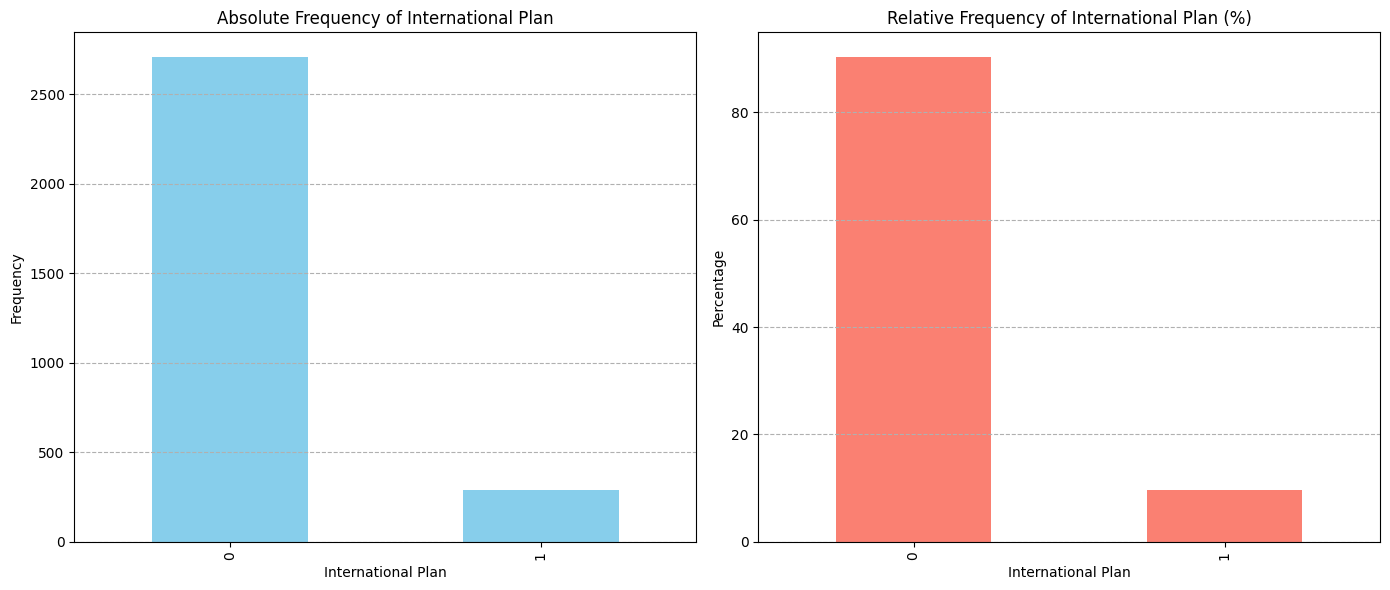

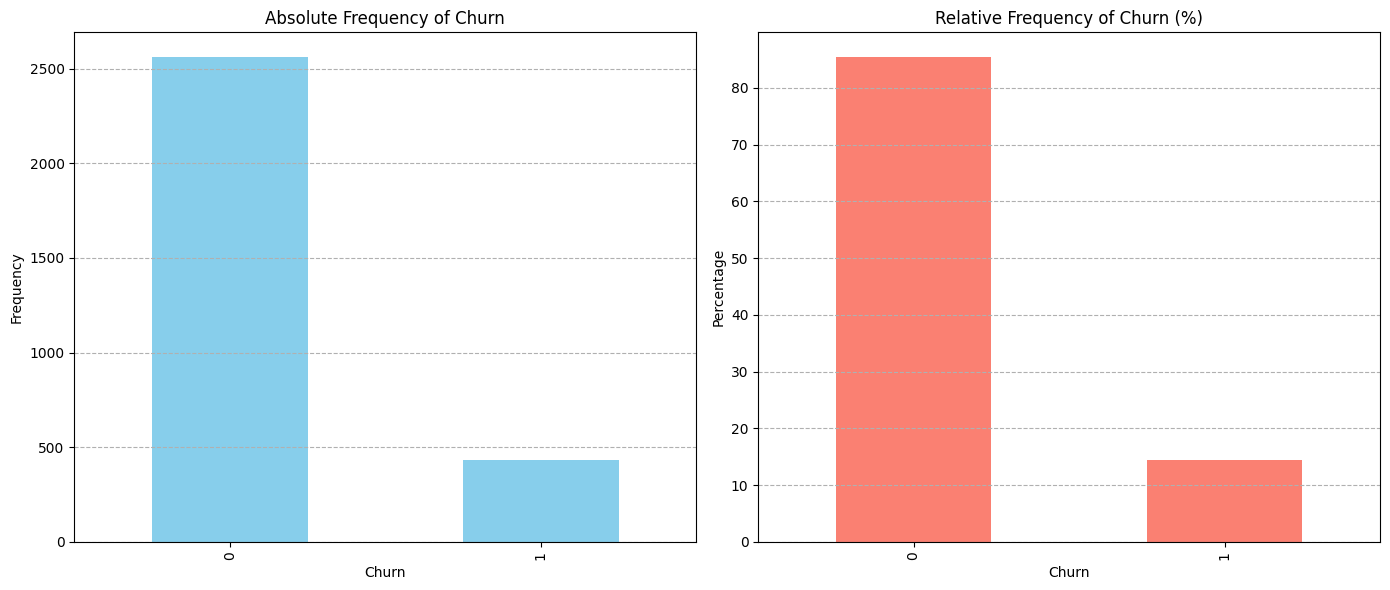

In [16]:
# Function to plot absolute and relative frequency for a given variable
def plot_frequency(variable, title):
    # Calculate absolute frequency
    abs_freq = absolute_frequency(variable)

    # Calculate relative frequency
    rel_freq = relative_frequency(variable)
    # Plotting
    plt.figure(figsize=(14, 6))

    # Absolute frequency
    plt.subplot(1, 2, 1)
    abs_freq.plot(kind='bar', color='skyblue')
    plt.title(f'Absolute Frequency of {title}')
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--')

    # Relative frequency
    plt.subplot(1, 2, 2)
    rel_freq.plot(kind='bar', color='salmon')
    plt.title(f'Relative Frequency of {title} (%)')
    plt.xlabel(title)
    plt.ylabel('Percentage')
    plt.grid(axis='y', linestyle='--')

    plt.tight_layout()
    plt.show()


plot_frequency('International plan', 'International Plan')
plot_frequency('Churn','Churn')

#### State and Churn

In [17]:
df_encoded['State'].unique()

array(['NE', 'TX', 'VT', 'GA', 'IL', 'IN', 'OK', 'TN', 'NV', 'VA', 'KS',
       'CO', 'WA', 'MT', 'ND', 'SD', 'AL', 'UT', 'MN', 'WI', 'OH', 'WY',
       'MD', 'RI', 'PA', 'CT', 'DC', 'DE', 'MA', 'OR', 'NJ', 'SC', 'MO',
       'HI', 'IA', 'LA', 'AK', 'ME', 'NM', 'KY', 'NY', 'MI', 'WV', 'FL',
       'NC', 'NH', 'AR', 'AZ', 'ID', 'CA', 'MS'], dtype=object)

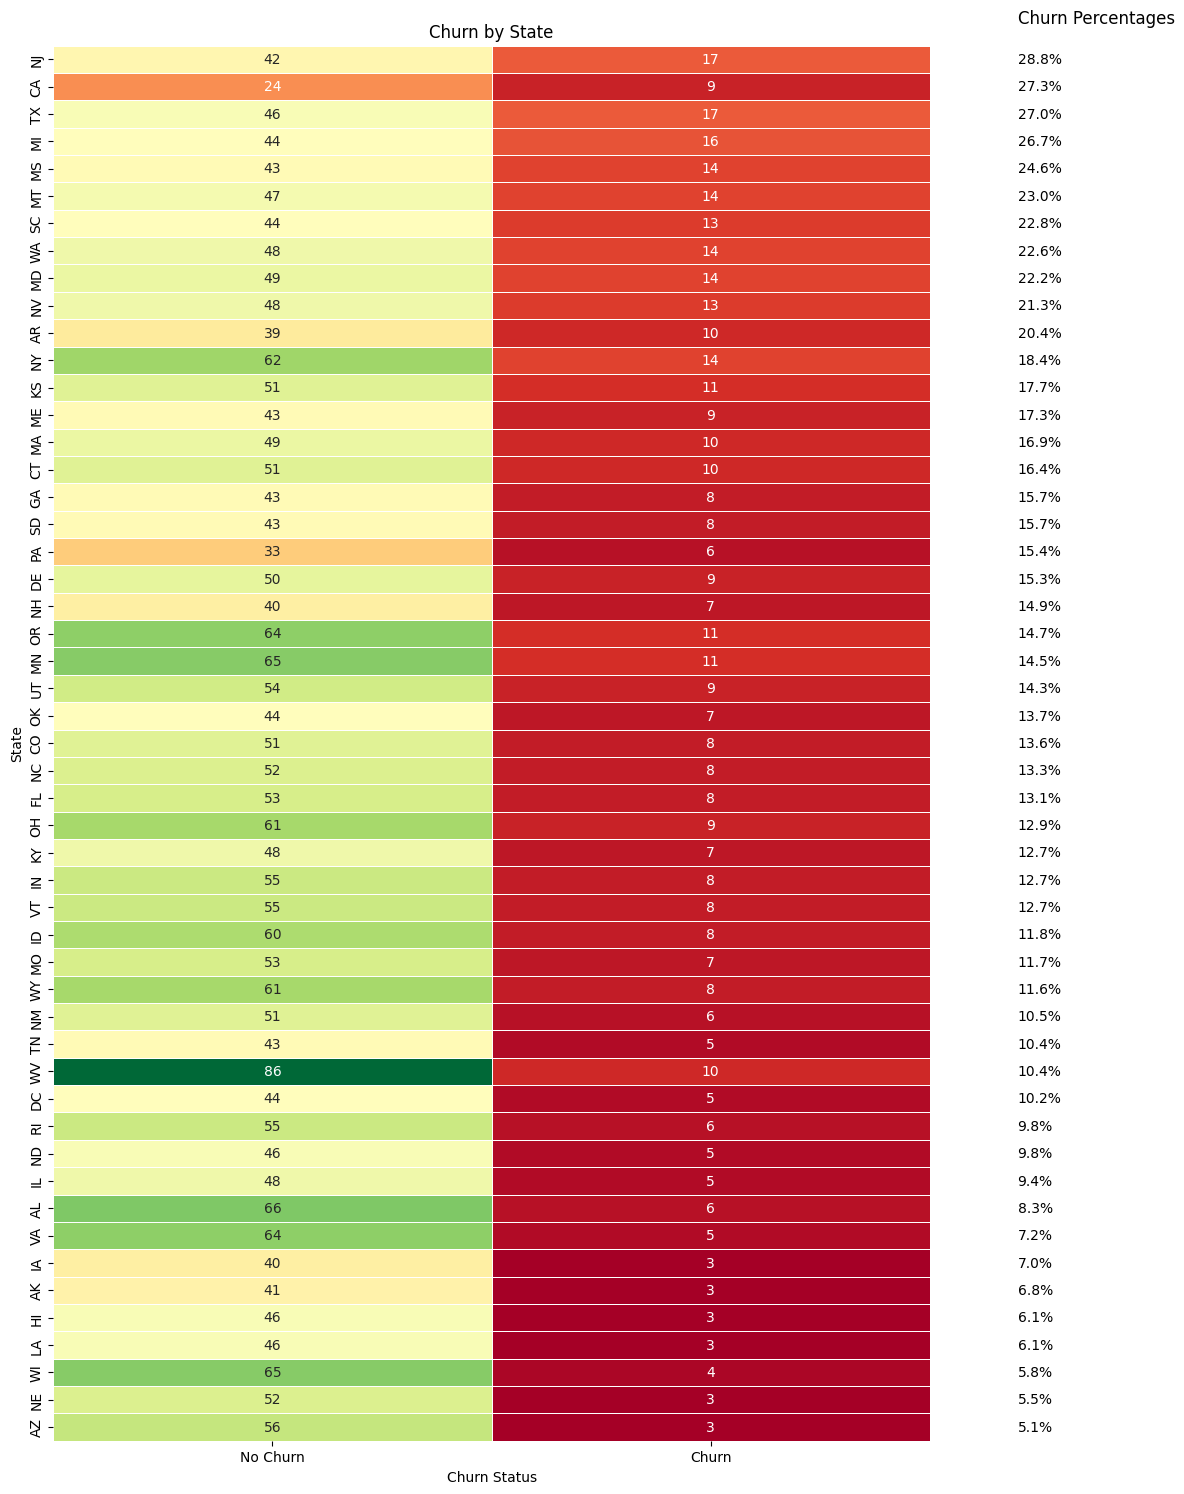

In [18]:
# Create a contingency table of No Churn (0) vs Churn (1) by State
contingency_table = pd.crosstab(df_encoded['State'], df_encoded['Churn'])
contingency_table.rename(columns={0: 'No Churn', 1: 'Churn'}, inplace=True)

# Calculate and sort states by churn rate
churn_rates = contingency_table['Churn'] / contingency_table.sum(axis=1)
contingency_table['Churn Rate'] = churn_rates
contingency_table.sort_values(by='Churn Rate', ascending=False, inplace=True)

# Plot the heatmap for raw counts (No Churn, Churn)
plt.figure(figsize=(12, 15))
sns.heatmap(
    contingency_table[['No Churn', 'Churn']],  # Only the count columns
    annot=True,
    fmt='d',
    cmap='RdYlGn',
    linewidths=0.5,
    cbar=False
)
plt.title("Churn by State")
plt.xlabel("Churn Status")
plt.ylabel("State")

# Annotate each row with the churn rate to the right of the heatmap
for i, rate in enumerate(contingency_table['Churn Rate']):
    plt.text(2.2, i + 0.5, f"{rate * 100:.1f}%", va='center', ha='left', color='black', fontsize=10)

# Add a small label above the churn rate annotations
plt.text(2.2, -1, 'Churn Percentages', va='center', ha='left', color='black', fontsize=12)

plt.tight_layout()
plt.show()

####  Spearman Correlation Matrix

<Axes: >

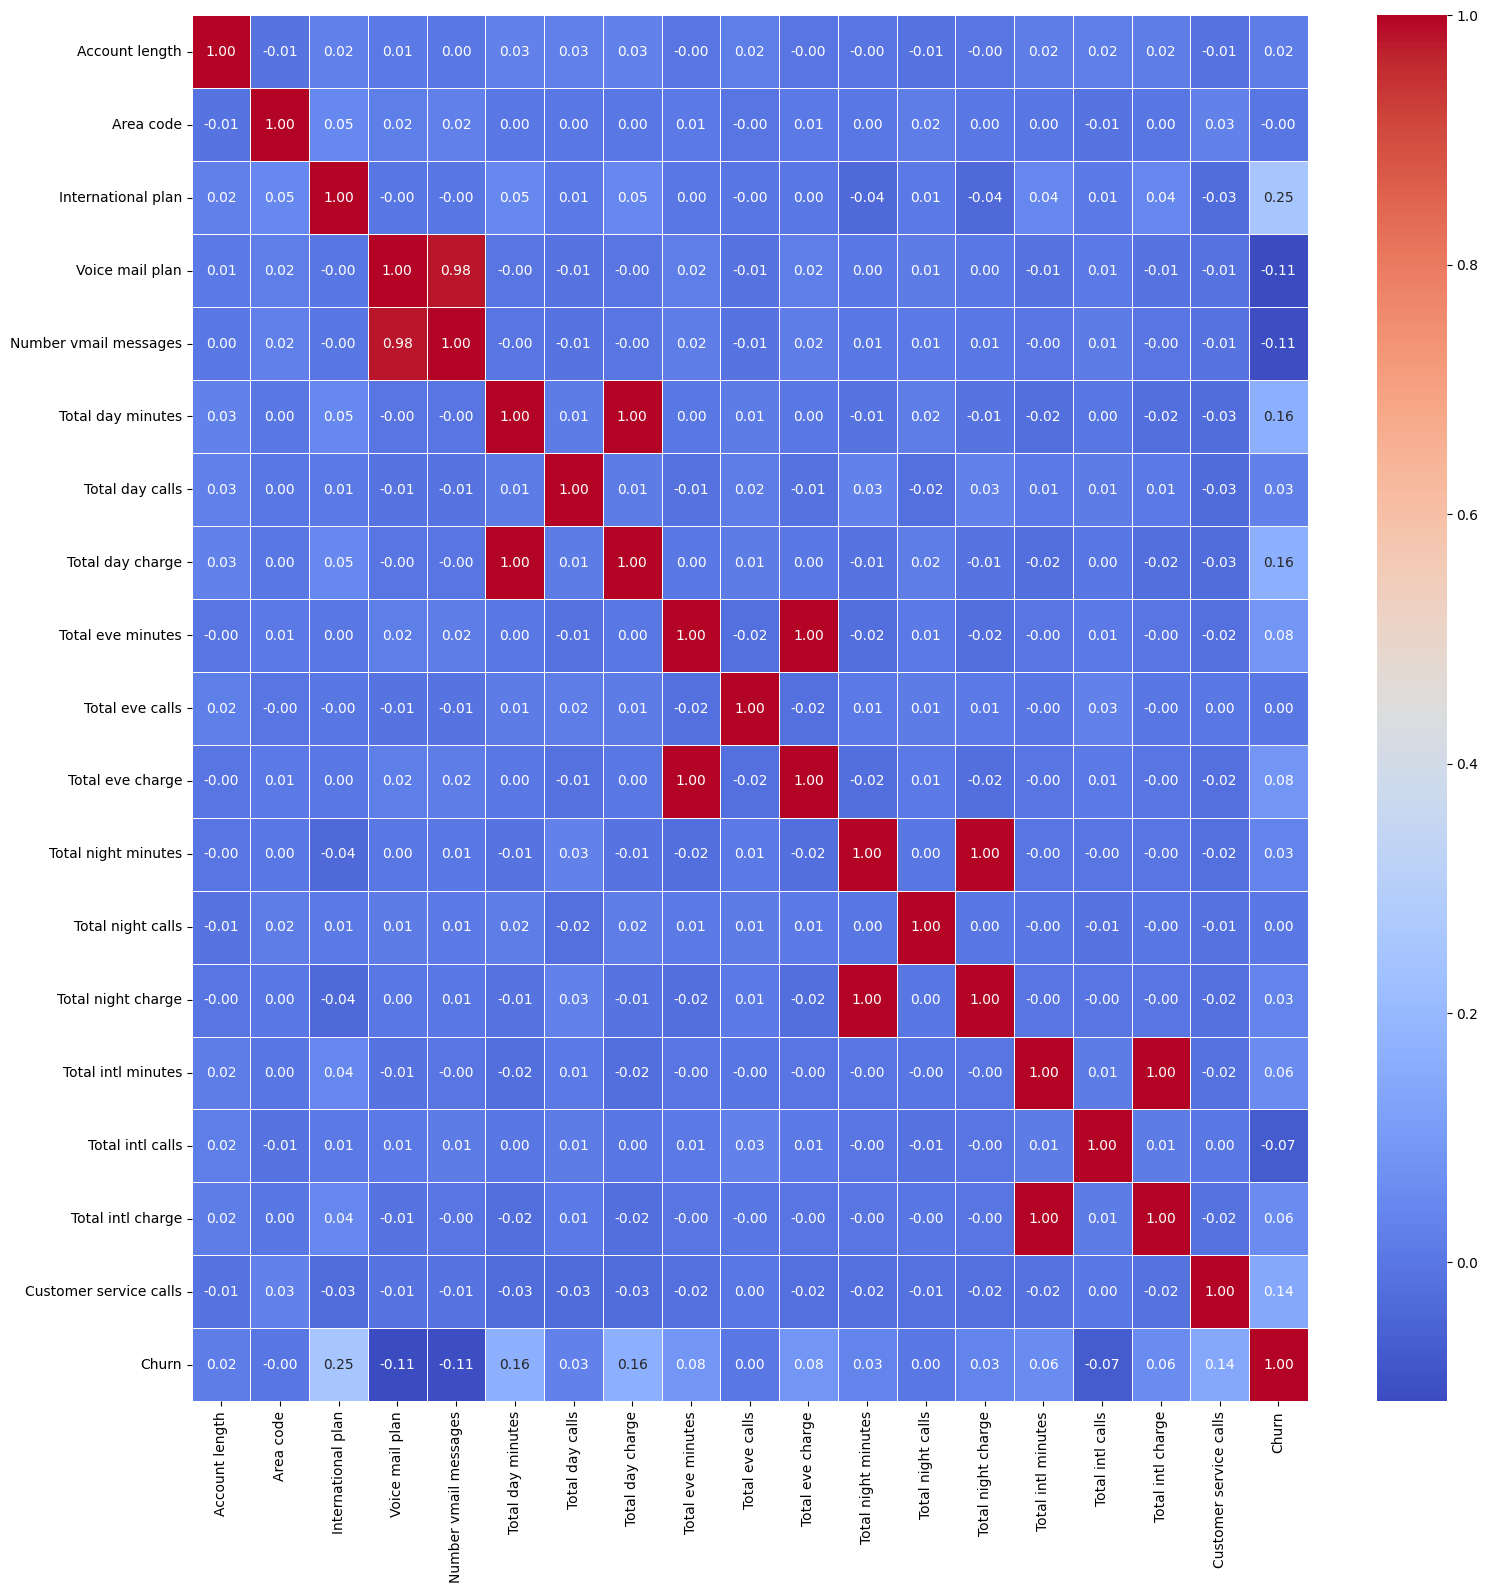

In [ ]:
# plot correlations 
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(method='spearman',numeric_only=True),annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)

#### Correlation with Churn

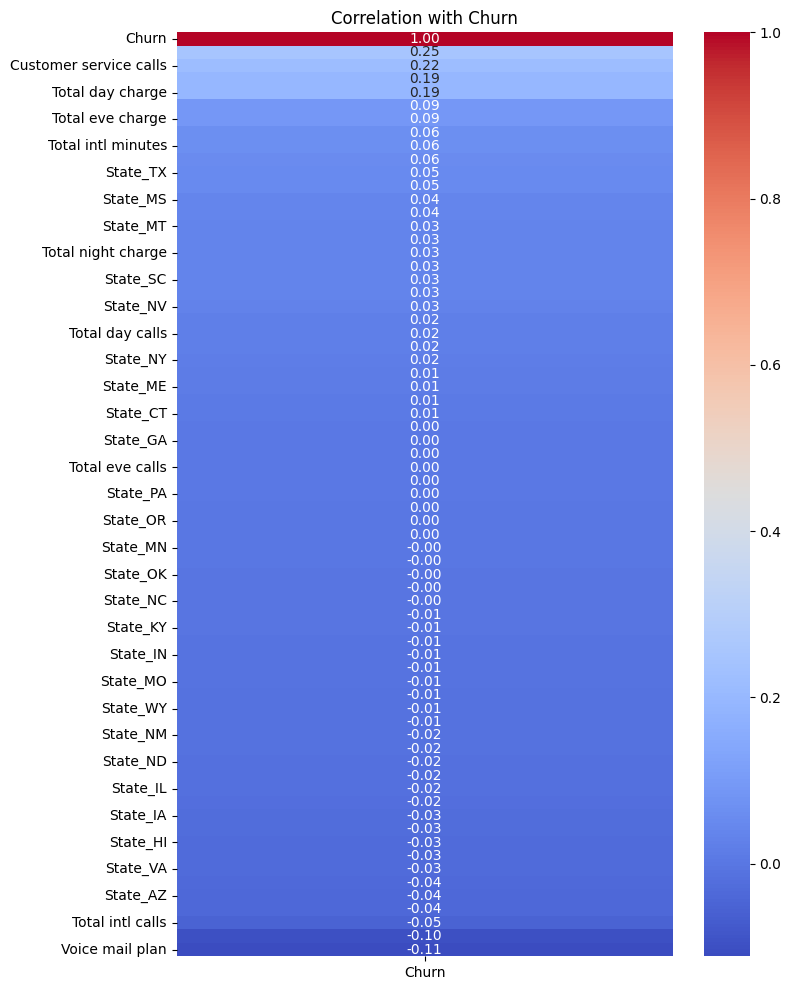

In [20]:
# # If you prefer One-Hot Encoding instead of dropping 'State',Apply One-Hot Encoding to 'State' (high-cardinality categorical variable)
df_encoded = pd.get_dummies(df_encoded, columns=["State"], drop_first=True)  # Avoid dummy variable trap


# 1. Create a mask to exclude "Churn" itself from the mask so we can add it back explicitly.
mask = (df_encoded.columns != 'Churn')

# 2. Build a filtered DataFrame that only has the non-State features.
df_filtered = df_encoded.loc[:, mask]

# 3. Add the 'Churn' column back so we can compute correlation with it.
df_filtered['Churn'] = df_encoded['Churn']

# 4. Compute correlation with Churn, then sort by that correlation.
corr_with_churn = df_filtered.corr()['Churn'].sort_values(ascending=False)

# 5. Convert this Series to a DataFrame so we can easily plot it via heatmap.
corr_df = corr_with_churn.to_frame()

# 6. Plot a single-column heatmap of correlations with Churn.
plt.figure(figsize=(8, 12))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation with Churn")
plt.show()


### Question 1.1<br>
Is the CEO statement correct?<br>
The CEO claims that 15% of customers churn are coming from international plan

In [21]:
# Calcualting the total number of churing customers
tot_churned = df_encoded[df_encoded['Churn'] == 1].shape[0]
print(f'Total Churned: {tot_churned}')

# Calculating the number of churned customers with an International Plan
churned_intl_plan = df_encoded[(df_encoded['International plan'] == 1) & (df_encoded['Churn'] == 1)].shape[0]
print(f'Total Churned With International Plan: {churned_intl_plan}')


print (f'Percentage of Churned People with International Plan: {churned_intl_plan/tot_churned*100:.2f}%')


Total Churned: 435
Total Churned With International Plan: 120
Percentage of Churned People with International Plan: 27.59%


No, the CEO statemment is not correct.</br>
The percentage of churned customers with an international plan is 27.59%

### Question 1.2<br>
Provide 3 insights you extracted from the EDA analysis

#### Insight 1
Customers with a voicemail plan churn less frequently than those without one.

/var/folders/gd/c1scy8hx7y1dt7y_3h39z_vr0000gn/T/ipykernel_24271/349926742.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_vmail.index, y=churn_rate_vmail.values, palette="coolwarm")


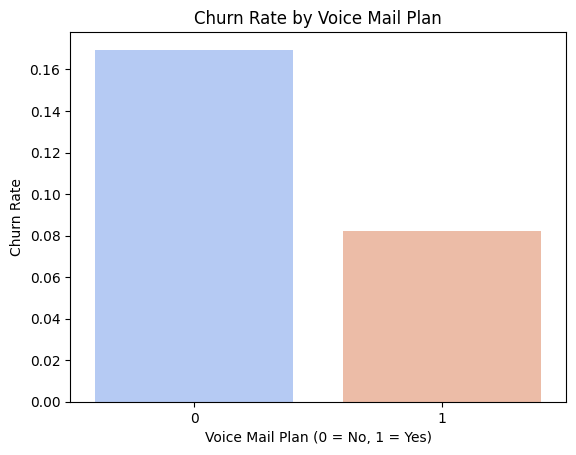

In [22]:
# Group by Voice Mail Plan and calculate churn rate
churn_rate_vmail = df_encoded.groupby("Voice mail plan")["Churn"].mean()

# Plot
sns.barplot(x=churn_rate_vmail.index, y=churn_rate_vmail.values, palette="coolwarm")
plt.xlabel("Voice Mail Plan (0 = No, 1 = Yes)")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Voice Mail Plan")
plt.show()


#### Insight 2
Customers who called customer service the most are more likely to churn.

/var/folders/gd/c1scy8hx7y1dt7y_3h39z_vr0000gn/T/ipykernel_24271/742597841.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="Customer service calls", data=df_encoded, palette="coolwarm")


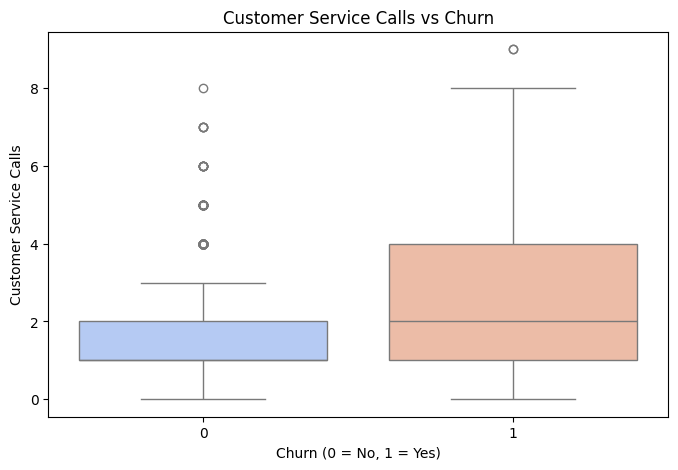

In [23]:
# Box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="Customer service calls", data=df_encoded, palette="coolwarm")

# Labels and title
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Customer Service Calls")
plt.title("Customer Service Calls vs Churn")
plt.show()

#### Insight 3
Imbalance distribution between Churn and Non-Churn with 85.5% of Non-Churned and 14.5% of Churned customers

In [24]:
# relative frequency for the 'gender' variable.
def relative_frequency (column):
    relative_freq = df_encoded[column].value_counts(normalize=True)*100
    realtive_freq = relative_freq.round(2)

    return realtive_freq


print(relative_frequency('Churn'),'\n')

Churn
0    85.5
1    14.5
Name: proportion, dtype: float64 



### Question 2.1

##### Which kind of machine learning problem is Telecom facing?
TelCom Solutions is dealing with a **binary classification** problem. In simple terms, we are sorting customers into two groups: those who are likely to churn and those who aren’t. We use data to help predict future behavior, enabling the company to take targeted actions to keep at-risk customers.

### Question 2.2
Train two models that are adecuated to the problem. Justify why you chose those.

In [25]:
# Copy the Original Dataset
df_model = df.copy()

In [26]:
# Encoding International plan, Voice mail plan and State

# Convert binary categorical variables to 0/1
df_model["International plan"] = df_model["International plan"].map({"Yes": 1, "No": 0})
df_model["Voice mail plan"] = df_model["Voice mail plan"].map({"Yes": 1, "No": 0})

# Encode target variable 'Churn' as 0 (No) and 1 (Yes)
df_model["Churn"] = df_model["Churn"].astype(int)


# One-Hot Encoding of 'State'
df_model = pd.get_dummies(df_model, columns=["State"], drop_first=True)  # Avoid dummy variable trap

df_model.head()


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,64,408,0,0,0,261.9,113,44.52,148.1,99,...,False,False,False,False,False,False,False,False,False,False
1,139,510,1,1,31,203.5,82,34.60,200.3,72,...,False,False,True,False,False,False,False,False,False,False
2,93,510,0,0,0,190.7,114,32.42,218.2,111,...,False,False,False,False,False,True,False,False,False,False
3,136,415,0,0,0,163.4,83,27.78,249.3,119,...,False,False,False,False,False,False,False,False,False,False
4,16,415,1,0,0,110.0,91,18.70,147.3,75,...,False,False,False,False,False,False,False,False,False,False


In [27]:
# Feature Engineering

df_engineered = df_model.copy()

df_engineered['Total Usage'] = df_engineered[['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']].sum(axis=1)
df_engineered['Total Charge'] = df_engineered[['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']].sum(axis=1)

df_engineered.drop(columns=['Total day minutes',
                            'Total eve minutes',
                            'Total night minutes',
                            'Total intl minutes',
                            'Total day charge',
                            'Total eve charge',
                            'Total night charge', 
                            'Total intl charge'], 
                            inplace=True
                            )

Splitting Test and Train

In [28]:
# Splitting the data into features and target
X = df_engineered.drop('Churn', axis=1)
y = df_engineered['Churn']

X.shape,y.shape

((2999, 62), (2999,))

- Scaling Features

In [29]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

- Train-test split

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### 1st Model: Logistic Regression

In [31]:
# Logistic Regression (Untuned)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [32]:
logreg_predictions = logreg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       512
           1       0.59      0.25      0.35        88

    accuracy                           0.86       600
   macro avg       0.74      0.61      0.64       600
weighted avg       0.84      0.86      0.84       600



- Hyperparameter Tuning with GridSearchCV

In [33]:
# Initialize Logistic Regression model with max_iter
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Updated hyperparameter grid for Logistic Regression (using elasticnet, saga, and class_weight)
log_reg_param_grid = {
    'penalty': ['elasticnet', 'l2'],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 1.0],  # L1 vs. L2 balance
    'C': [0.1, 1, 10],
    'solver': ['saga','liblinear'],                    # required for elasticnet penalty
    'class_weight': [None, 'balanced']
}

# GridSearchCV for Logistic Regression with 5-fold cross-validation using ROC AUC scoring
log_reg_search = GridSearchCV(log_reg, log_reg_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit GridSearchCV on the training data
log_reg_search.fit(X_train, y_train)

/Users/marco/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/marco/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/marco/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/marco/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/marco/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got 

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 1.0],
                         'penalty': ['elasticnet', 'l2'],
                         'solver': ['saga', 'liblinear']},
             scoring='roc_auc')

In [34]:
# Initialize Logistic Regression model with max_iter
log_reg = LogisticRegression(max_iter=1000, random_state=42)
# Hyperparameters grid for Logistic Regression
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
    }
# GridSearchCV for Logistic Regression with 5-fold cross-validation
log_reg_search = GridSearchCV(log_reg, log_reg_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
log_reg_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [35]:
# Print best hyperparameters for Logistic Regression
print(f"Best Logistic Regression Parameters: {log_reg_search.best_params_}")

Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [36]:
# Evaluate Logistic Regression with the best model
log_reg_best = log_reg_search.best_estimator_

# Logistic Regression Predictions
log_reg_preds = log_reg_best.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, log_reg_preds))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       512
           1       0.62      0.18      0.28        88

    accuracy                           0.86       600
   macro avg       0.74      0.58      0.60       600
weighted avg       0.84      0.86      0.83       600



- Asses Model Performance

Confusion Matrix:
[[502  10]
 [ 72  16]]


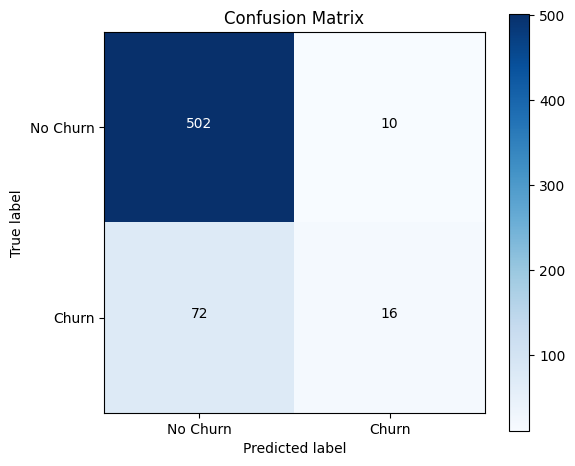

Accuracy: 0.8633
F1 Score: 0.2807
Recall: 0.1818


In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, log_reg_preds)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = ['No Churn', 'Churn']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add text labels to each cell using np.arange instead of range
thresh = cm.max() / 2.
for i in np.arange(cm.shape[0]):
    for j in np.arange(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Additional Metrics
accuracy = accuracy_score(y_test, log_reg_preds)
f1 = f1_score(y_test, log_reg_preds)
recall = recall_score(y_test, log_reg_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")


- ROC - AUC curve

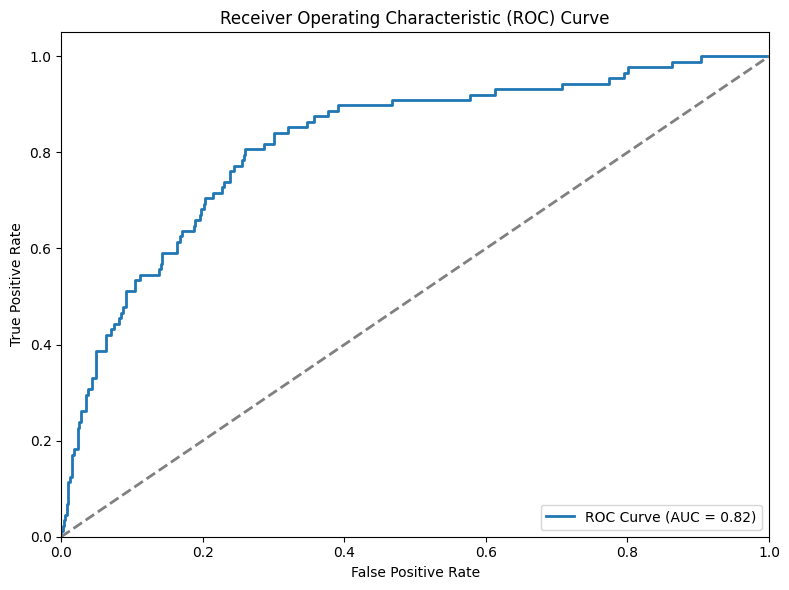

In [38]:
# Obtain the predicted probabilities for the positive class (Churn=1)
y_prob = log_reg_best.predict_proba(X_test)[:, 1]

# Compute the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--', color='gray')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

- Training and Test Accuracy

In [39]:
# Predictions on training data and computing accuracy

# Predictions on training data
train_preds = log_reg_best.predict(X_train)

# Compute accuracy on training and test sets
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, log_reg_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.8666
Test Accuracy: 0.8633


#### 2nd Model: Random Forest

In [40]:
# Random Forest Classifier (Untuned)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# Predictions and evaluation for Random Forest Classifier
rf_predictions = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       512
           1       1.00      0.69      0.82        88

    accuracy                           0.95       600
   macro avg       0.97      0.85      0.90       600
weighted avg       0.96      0.95      0.95       600



- Hyperparameter Tuning with GridSearchCV

In [42]:
#Random Forest Classifier - Hyperparameter Tuning

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
}

# Initialize the GridSearchCV with Random Forest model
rf_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                         param_grid=rf_param_grid, 
                         cv=5, 
                         n_jobs=-1, 
                         verbose=2, 
                         scoring='roc_auc')

# Fit GridSearchCV on training data
rf_search.fit(X_train, y_train)

# Best Parameters found by GridSearchCV
print(f"Best Random Forest Parameters: {rf_search.best_params_}")

# Evaluate the best Random Forest model
rf_best = rf_search.best_estimator_
rf_best_predictions = rf_best.predict(X_test)

# Classification report for the best Random Forest model
print("Random Forest with Best Parameters Classification Report:")
print(classification_report(y_test, rf_best_predictions))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s[CV] END bootst

- Asses Random Forest Performance

Confusion Matrix:
[[512   0]
 [ 32  56]]


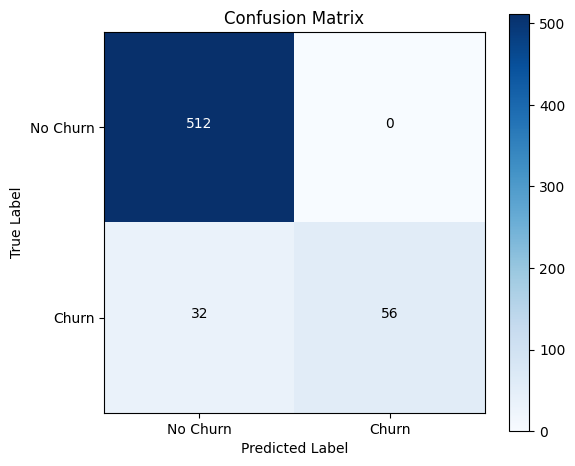

Accuracy: 0.9467
F1 Score: 0.7778
Recall: 0.6364


In [43]:
# --- Confusion Matrix ---
cm_rf = confusion_matrix(y_test, rf_best_predictions)
print("Confusion Matrix:")
print(cm_rf)

plt.figure(figsize=(6, 5))
plt.imshow(cm_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = ['No Churn', 'Churn']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add text labels to each cell
thresh = cm_rf.max() / 2.
for i in np.arange(cm_rf.shape[0]):
    for j in np.arange(cm_rf.shape[1]):
        plt.text(j, i, format(cm_rf[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_rf[i, j] > thresh else "black")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# --- Additional Performance Metrics ---
accuracy_rf = accuracy_score(y_test, rf_best_predictions)
f1_rf = f1_score(y_test, rf_best_predictions)
recall_rf = recall_score(y_test, rf_best_predictions)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")

- ROC - AUC Curve

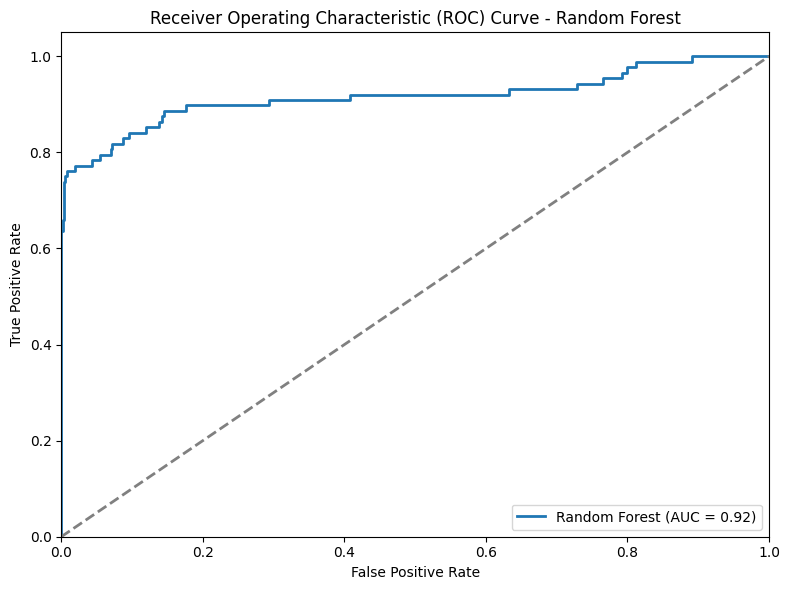

In [44]:
# --- ROC Curve ---
# Get predicted probabilities for the positive class
y_prob_rf = rf_best.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--', color='gray')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

- Training and Test Accuracy

In [45]:
# Predictions on training data for the best model
rf_best_train_preds = rf_best.predict(X_train)
# Compute training and test accuracy for the best model
train_acc_rf_best = accuracy_score(y_train, rf_best_train_preds)
test_acc_rf_best = accuracy_score(y_test, rf_best_predictions)
print(f"Best RF - Training Accuracy: {train_acc_rf_best:.4f}")
print(f"Best RF - Test Accuracy: {test_acc_rf_best:.4f}")

Best RF - Training Accuracy: 0.9687
Best RF - Test Accuracy: 0.9467


### Question 3.1
Which performance metric did you use to evaluate the performance? Why?

#### Answer:<br>
To assess the performance of both models I look at: Accuracy, F1-Score, Recall and ROC-AUC.
When comparing two models with different underlying approaches, ROC-AUC is preferred as it is threshold independent and provides a clear picture of how well each model distinguishes between classes. Additionally, in case of imbalanced samples, ROC-AUC 
is often more reliable than accuracy alone.

### Question 3.2
Which model provided the best results?

#### Answer:<br>
The **Random Forest** model performs better because it achieves higher accuracy, a much higher ROC-AUC, and significantly better F1 and recall scores. These improvements demonstrate that the Random Forest is more effective at correctly identifying both classes.
Although the Random Forest shows higher training accuracy (96.87%), its test accuracy (94.67%) is still very high and suggests that the model generalizes well without excessive overfitting

- Comparing ROC - AUC curves of both models

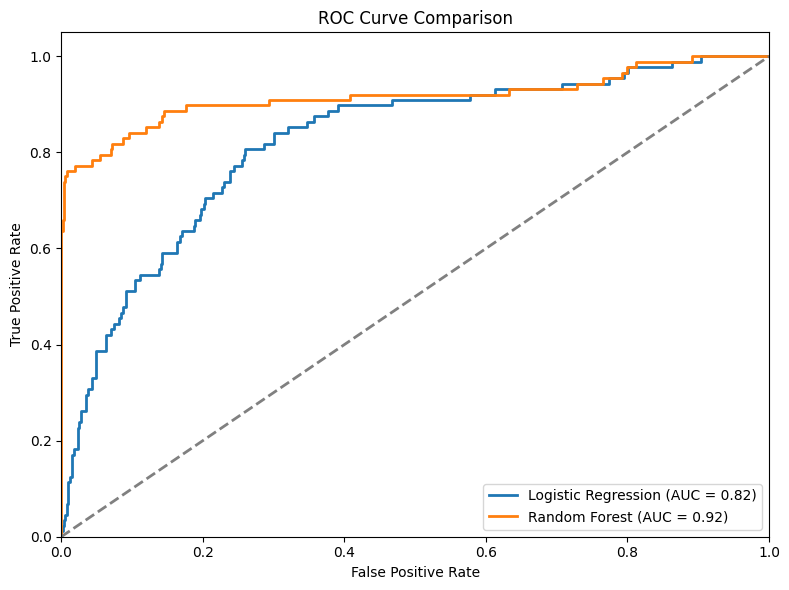

In [46]:
# Obtain predicted probabilities for the positive class from both models
y_prob_logreg = log_reg_best.predict_proba(X_test)[:, 1]
y_prob_rf = rf_best.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot both ROC curves on the same figure
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--', color='gray')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### Question 4 - Pickle Models

##### 1st Model: Logistic Regression - Pickled

In [ ]:
import pandas as pd
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

# Step 1: Load the dataset
df = pd.read_csv('/Users/marco/Library/CloudStorage/OneDrive-NovaSBE/T3/Machine Learning/Assignment 1/2767ML_assignment1_data.csv')

# Step 2: Feature Engineering
def feature_engineering(X):
    df = X.copy()
    # Convert binary categorical variables to 0/1
    df["International plan"] = df["International plan"].map({"Yes": 1, "No": 0})
    df["Voice mail plan"] = df["Voice mail plan"].map({"Yes": 1, "No": 0})
    
    # One-Hot Encode 'State' (drop first to avoid dummy variable trap)
    df = pd.get_dummies(df, columns=["State"], drop_first=True)
    
    # Feature Engineering: Create new features
    df['Total Usage'] = df[['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']].sum(axis=1)
    df['Total Charge'] = df[['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']].sum(axis=1)
    
    # Drop the original columns that are no longer needed
    df.drop(columns=['Total day minutes',
                     'Total eve minutes',
                     'Total night minutes',
                     'Total intl minutes',
                     'Total day charge',
                     'Total eve charge',
                     'Total night charge', 
                     'Total intl charge'], inplace=True)
    return df

# Wrap the custom preprocessing function in a FunctionTransformer
preprocessing_transformer = FunctionTransformer(feature_engineering)

# Step 3: Build the Pipeline with Preprocessing and Logistic Regression Model
pipeline = Pipeline([
    ('preprocessing', preprocessing_transformer),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(solver='liblinear', max_iter=1000))
])

# Prepare features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn'].astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the baseline pipeline on the training data
pipeline.fit(X_train, y_train)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['liblinear']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve the best pipeline from GridSearchCV
best_pipeline = grid_search.best_estimator_

# Step 4: Save the Trained Pipeline using pickle
filename = '63996_LogisticRegression.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_pipeline, file)

print(f"Pipeline saved as {filename}")


Pipeline saved as 63996_LogisticRegression.pkl


##### 2nd Model: Random Forest - Pickled

In [1]:
import pandas as pd
import pickle
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

df = pd.read_csv('/Users/marco/Library/CloudStorage/OneDrive-NovaSBE/T3/Machine Learning/Assignment 1/2767ML_assignment1_data.csv')

X = df.drop('Churn', axis=1)
y = df['Churn'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def feature_engineering(X):
    df_rf = X.copy()
    df_rf["International plan"] = df_rf["International plan"].map({"Yes": 1, "No": 0})
    df_rf["Voice mail plan"] = df_rf["Voice mail plan"].map({"Yes": 1, "No": 0})
    df_rf['Total Usage'] = df_rf[['Total day minutes','Total eve minutes','Total night minutes','Total intl minutes']].sum(axis=1)
    df_rf['Total Charge'] = df_rf[['Total day charge','Total eve charge','Total night charge','Total intl charge']].sum(axis=1)
    df_rf.drop(columns=[
        'Total day minutes','Total eve minutes','Total night minutes','Total intl minutes',
        'Total day charge','Total eve charge','Total night charge','Total intl charge'
    ], inplace=True)
    return df_rf

feature_transformer = FunctionTransformer(feature_engineering)

# Numeric columns in your dataset after feature_engineering
numeric_cols = [
    'Account length','Area code','International plan','Voice mail plan',
    'Number vmail messages','Customer service calls','Total Usage','Total Charge'
]

# The 'State' column is left for one-hot encoding
cat_cols = ['State']

column_trans = ColumnTransformer([
    (
        'ohe_state',
        OneHotEncoder(
            drop='first',
            handle_unknown='ignore',
            sparse_output=False  # Ensure dense array so StandardScaler can center data
        ),
        cat_cols
    ),
    ('pass_numeric', 'passthrough', numeric_cols)
])

pipeline_rf = Pipeline([
    ('feature_step', feature_transformer),
    ('transform', column_trans),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

pipeline_rf.fit(X_train, y_train)

param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(
    pipeline_rf,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)
grid_search_rf.fit(X_train, y_train)

best_pipeline_rf = grid_search_rf.best_estimator_

filename_rf = '63996_RandomForest.pkl'
with open(filename_rf, 'wb') as file:
    pickle.dump(best_pipeline_rf, file)

print(f"Pipeline saved as {filename_rf}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END model__bootstrap=True, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   0.3s
[CV] END model__bootstrap=True, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   0.3s
[CV] END model__bootstrap=True, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   0.3s
[CV] END model__bootstrap=True, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   0.3s
[CV] END model__bootstrap=True, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   0.3s
[CV] END model__bootstrap=True, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   0.5s
[CV] END model__bootstrap=True, mod

/Users/marco/Library/Python/3.9/lib/python/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Pipeline saved as 63996_RandomForest.pkl


### Question 5.1
What customer characteristics most strongly influence churn?

##### Answer: <br>
Overall, the **Logistic Regression** chart clearly shows how each feature influences the likelihood of churn—whether it increases or decreases it. In contrast, the **Random Forest** chart highlights which features matter most, but does not show whether they push churn probability up or down. Both models agree that features like **customer service calls**, **total charge**, and **international plan** are important, although their rankings differ because each model learns patterns in its own way.

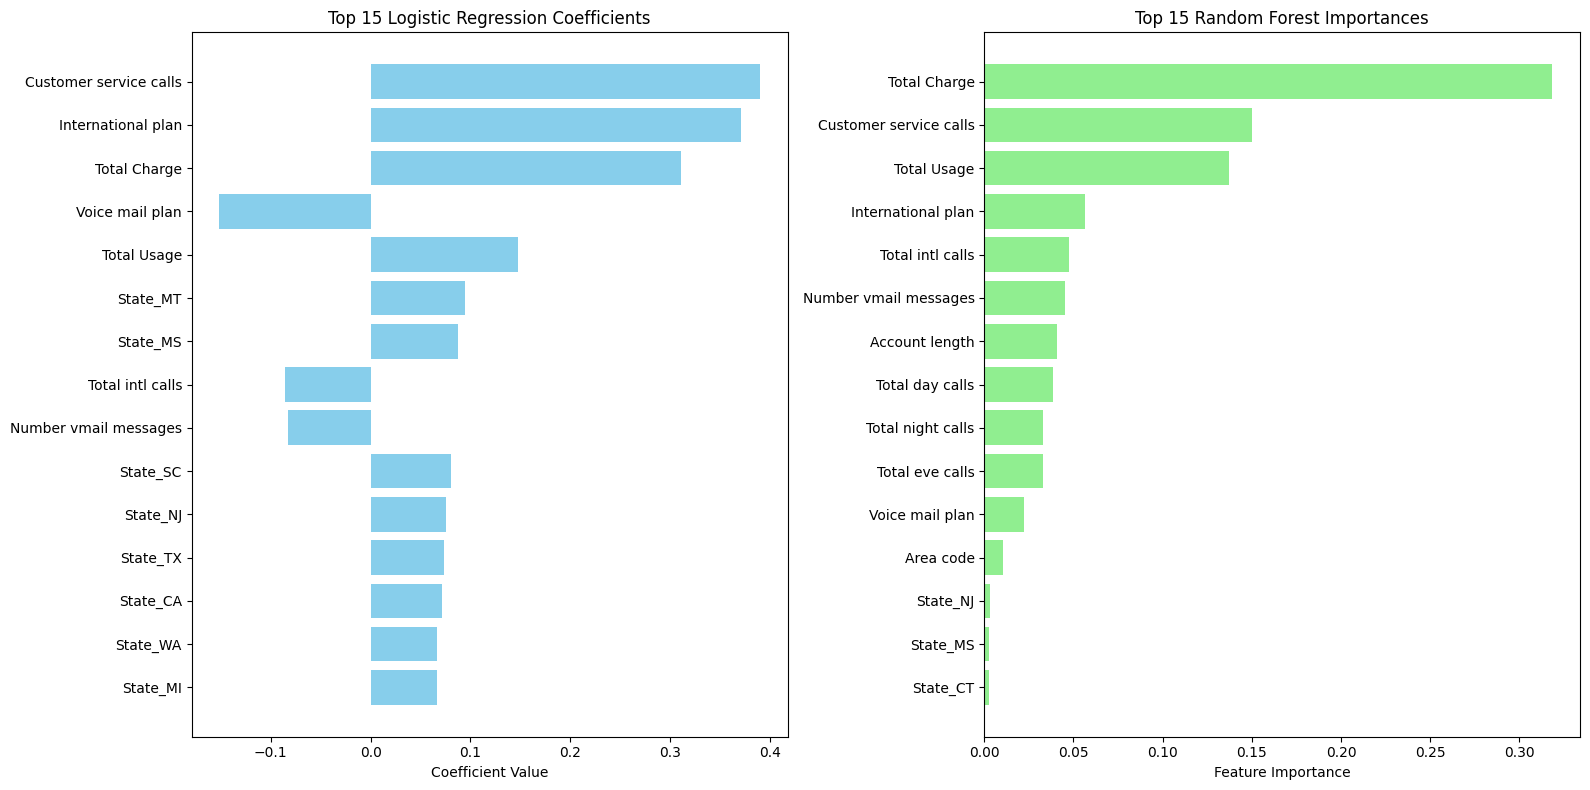

In [49]:
# Retrieve original feature names from df_engineered (excluding the target)
feature_names = df_engineered.drop('Churn', axis=1).columns

# ---- Logistic Regression Coefficients ----
# Get the coefficient weights from the best logistic regression model
logreg_coeff = log_reg_best.coef_[0]

# Create a DataFrame for logistic regression coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': logreg_coeff
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
top15_logreg = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(15)

# ---- Random Forest Feature Importances ----
# Get feature importances from the best Random Forest model
rf_importances = rf_best.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importances
})
top15_rf = importance_df.sort_values(by='Importance', ascending=False).head(15)

# ---- Plotting Side by Side ----
fig, axes = plt.subplots(ncols=2, figsize=(16, 8))

# Logistic Regression Coefficients Plot
axes[0].barh(top15_logreg['Feature'], top15_logreg['Coefficient'], color='skyblue')
axes[0].set_xlabel("Coefficient Value")
axes[0].set_title("Top 15 Logistic Regression Coefficients")
axes[0].invert_yaxis()  # Highest coefficient at the top

# Random Forest Importances Plot
axes[1].barh(top15_rf['Feature'], top15_rf['Importance'], color='lightgreen')
axes[1].set_xlabel("Feature Importance")
axes[1].set_title("Top 15 Random Forest Importances")
axes[1].invert_yaxis()  # Highest importance at the top

plt.tight_layout()
plt.show()


### Question 5.2
What actionable steps should the company take to reduce churn?

**Overall Strategy**<br>
Create a churn-prevention plan that identifies high-risk customers—those who make many support calls or have large bills—and gives them timely help. Keep collecting feedback to improve your products, prices, and services. Finally, use churn data to fine-tune your customer segments and focus retention efforts where they matter most.

**High Customer Service Calls**<br>
Frequent calls to the Customer Service could signal customer frustration. A proactive outreach program can address issues early and prevent escalation.

**High Total Charge**<br>
Expensive bills can drive customers to seek cheaper alternatives. Offering loyalty discounts or alternative plans to high-charge customers can mitigate this.